In [1]:
import numpy as np  # for numerics (matrix math)
from scipy.sparse import diags  # for numerics (creating diagonal matrix)
from scipy.stats import gaussian_kde  # for numerics (DOS)
import matplotlib.pyplot as plt  # for plotting

# for vector plots:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
def chain(N, E0, t):
    return diags([(N-1)*[t], N*[E0], (N-1)*[t]], (-1, 0, 1))

In [3]:
def ring(N, E0, t):
    H = chain(N, E0, t).todense()
    H[0, N-1] = t
    H[N-1, 0] = t
    return H

In [4]:
# %timeit np.linalg.eigvalsh(ring(1001, 0, 2.5))  # 90ms
# %timeit np.linalg.eigvals(ring(1001, 0, 2.5))  # 900ms
H = ring(1001, 0, 2.5)
ev = np.linalg.eigvalsh(H)
print(H)

[[0.  2.5 0.  ... 0.  0.  2.5]
 [2.5 0.  2.5 ... 0.  0.  0. ]
 [0.  2.5 0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  2.5 0. ]
 [0.  0.  0.  ... 2.5 0.  2.5]
 [2.5 0.  0.  ... 0.  2.5 0. ]]


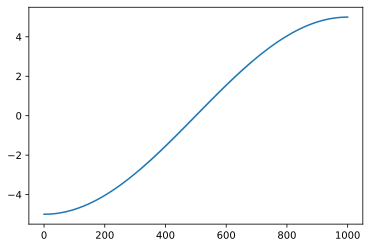

In [5]:
plt.plot(ev)

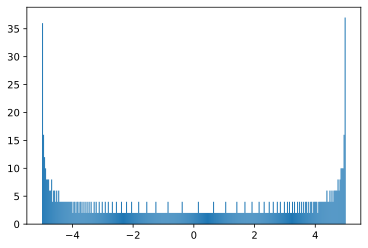

In [6]:
h = plt.hist(ev, bins=300)

In [7]:
kde = gaussian_kde(ev, 0.01)

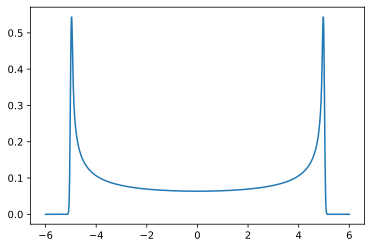

In [8]:
xrange = np.linspace(-6, 6, 1000)
plt.plot(xrange, kde.pdf(xrange))

In [9]:
H_imp = ring(1001, 0, 2.5)
i_imp = 500
H_imp[i_imp, i_imp] = -2
print(H_imp)
print()
print(H_imp[497:504, 497:504])

[[0.  2.5 0.  ... 0.  0.  2.5]
 [2.5 0.  2.5 ... 0.  0.  0. ]
 [0.  2.5 0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  2.5 0. ]
 [0.  0.  0.  ... 2.5 0.  2.5]
 [2.5 0.  0.  ... 0.  2.5 0. ]]

[[ 0.   2.5  0.   0.   0.   0.   0. ]
 [ 2.5  0.   2.5  0.   0.   0.   0. ]
 [ 0.   2.5  0.   2.5  0.   0.   0. ]
 [ 0.   0.   2.5 -2.   2.5  0.   0. ]
 [ 0.   0.   0.   2.5  0.   2.5  0. ]
 [ 0.   0.   0.   0.   2.5  0.   2.5]
 [ 0.   0.   0.   0.   0.   2.5  0. ]]


In [10]:
ev_imp = np.linalg.eigvalsh(H_imp)

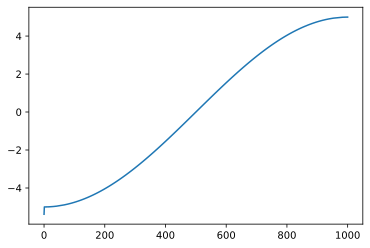

In [11]:
plt.plot(ev_imp)

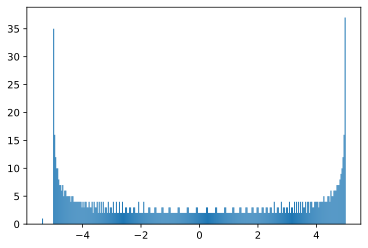

In [12]:
h = plt.hist(ev_imp, bins=300)

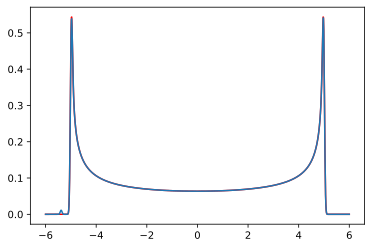

In [13]:
plt.plot(xrange, kde.pdf(xrange), color='red')
plt.plot(xrange, gaussian_kde(ev_imp, 0.01).pdf(xrange))

In [14]:
eval_imp, evec_imp = np.linalg.eigh(H_imp)

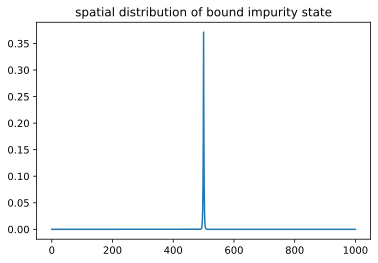

In [15]:
# evec [input states, output eigenstates]
plt.title('spatial distribution of bound impurity state')
plt.plot((evec_imp.A[:, 0])**2)

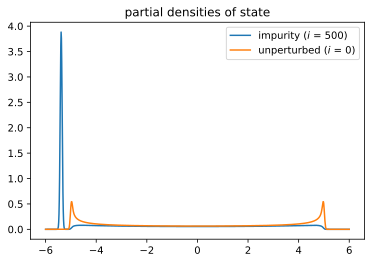

In [16]:
imp_weight = np.abs(evec_imp.A[i_imp])**2
oth_weight = np.abs(evec_imp.A[0])**2

pdos_imp = gaussian_kde(eval_imp, 0.01, weights=imp_weight).pdf(xrange)
pdos_oth = gaussian_kde(eval_imp, 0.01, weights=oth_weight).pdf(xrange)

plt.plot(xrange, pdos_imp,
         label='impurity ($i$ = 500)')
plt.plot(xrange, pdos_oth,
         label='unperturbed ($i$ = 0)')
plt.title('partial densities of state')
plt.legend()